In [1]:
import numpy as np
from ML.EFPs.data_loaders import load_data_qg_tagging 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from utilities import utilities

In [25]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_qg_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_qg_tagging(
    quark_data_path=f"{root_data_folder}/Test/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Test/g_jets_efps_d5_primed.npy"
)

In [26]:
# Let us use the StandardScaler to leave each feature with the same order of magniture
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
# defining the model
# l2, C = 0.04, solver = lbfgs
# l1, C = 0.0005, solver = saga
log_reg = LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=500)
log_reg.fit(X_train, y_train)

coefs = ', '.join([f'{val:.2f}' for val in log_reg.coef_[0]])
print(f"Coefficients:", coefs)
print(f"Intercept {log_reg.intercept_[0]:.3f}")

Coefficients: 1.72, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.41, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, -0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, -0.19, 0.00, 0.00, 0.00, 0.00
Intercept -0.273


In [28]:
print("Non-vanishing coefficients indices:")
best_efps = np.where(abs(log_reg.coef_[0]) > 0)[0]
print(best_efps)

Non-vanishing coefficients indices:
[ 0 12 34 49]


In [29]:
# Tranning set
y_train_predict = log_reg.predict_proba(X_train)
y_val_predict = log_reg.predict_proba(X_val)

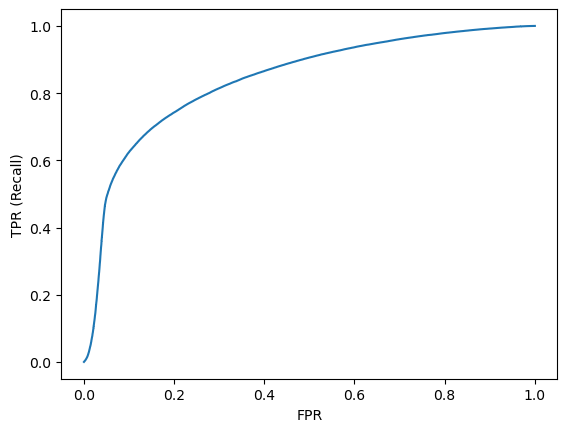

AUC: 0.8402


In [30]:
utilities.display_roc_curve(y_train, y_train_predict[:, 1])


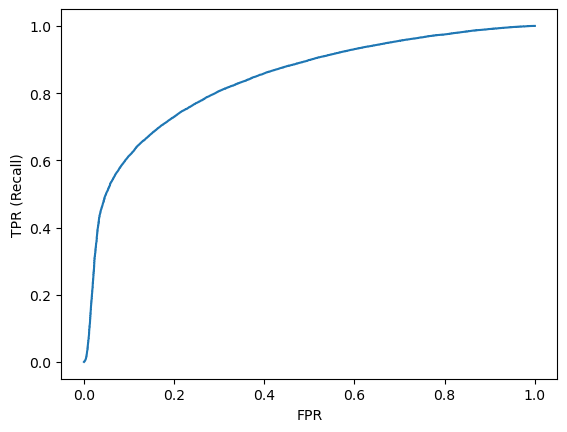

AUC: 0.8388


In [31]:
utilities.display_roc_curve(y_val, y_val_predict[:, 1])